<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Decision_Tree_Implement/Decision_tree_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree Implement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv( "/content/WineQT_lyst1754241578855.csv" )
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


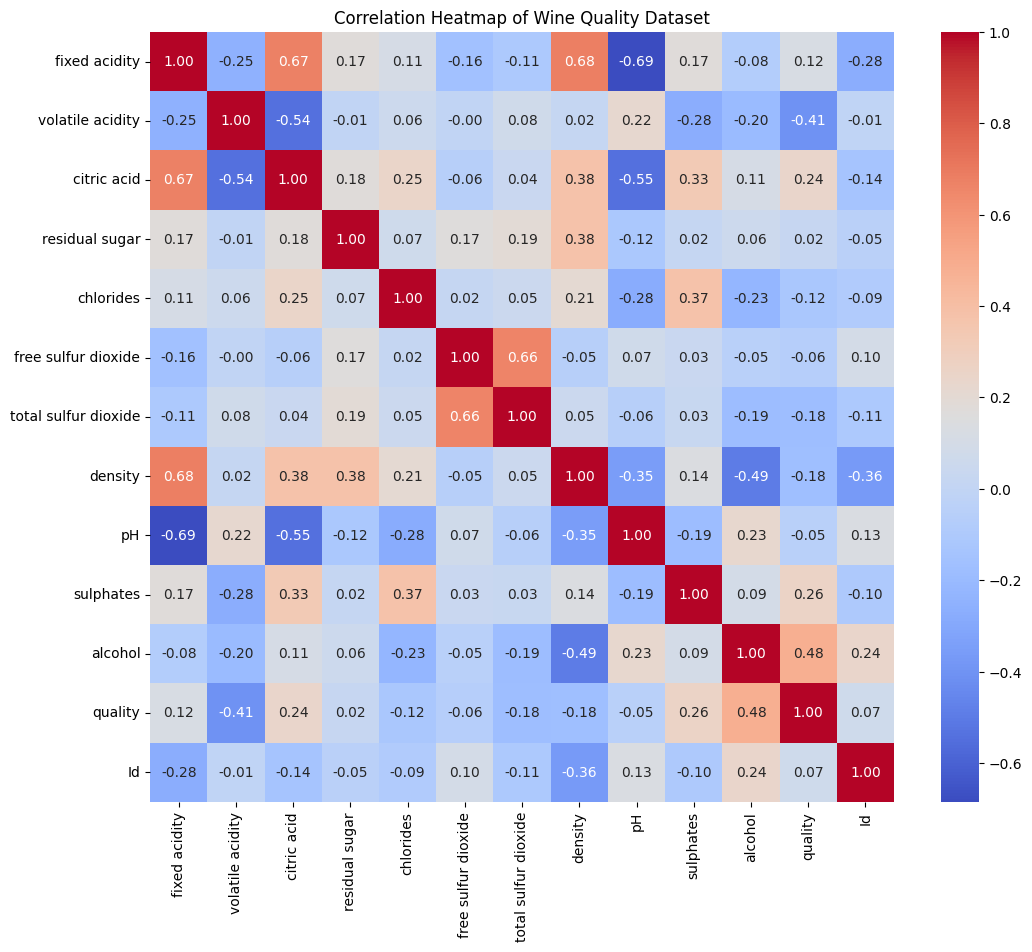

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()

In [6]:
data.drop(columns=['Id'], axis=1, inplace=True)

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# X and Y features
X = data.drop( columns=['quality'] , axis=1 )
Y= data['quality']

In [9]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [10]:
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


In [12]:
# test and train split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=44)

In [14]:
# model train model name DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# test the model
y_predict= model.predict(X_test)

y_predict

array([5, 6, 6, 7, 6, 6, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 6, 7, 6, 5, 5,
       5, 6, 5, 7, 6, 5, 5, 6, 8, 6, 7, 6, 6, 4, 7, 5, 7, 5, 5, 5, 6, 5,
       5, 5, 7, 5, 6, 6, 5, 7, 4, 6, 5, 7, 7, 6, 7, 6, 5, 6, 6, 7, 6, 6,
       5, 7, 5, 6, 7, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 7, 6, 5, 6, 5,
       6, 5, 6, 5, 7, 6, 7, 6, 6, 7, 6, 6, 4, 6, 5, 6, 5, 6, 7, 4, 5, 7,
       5, 6, 6, 6, 4])

In [29]:
# confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

confusion_matrix(y_test, y_predict)

array([[ 0,  1,  1,  2,  0],
       [ 4, 26, 10,  2,  0],
       [ 1,  9, 33,  7,  1],
       [ 0,  1,  4, 11,  1],
       [ 0,  0,  1,  0,  0]])

In [30]:
# accuracy score model
accuracy_score(y_test, y_predict)

0.6086956521739131

## Bagging Technique



##  Bagging Technique in Decision Trees (Machine Learning)

### 1. **What is Bagging?**

* **Bagging** = **Bootstrap Aggregating**
* It is an **ensemble technique** used to improve the stability and accuracy of ML models (especially **Decision Trees** which are prone to overfitting).
* The idea: Train multiple **independent models** on different subsets of the training data, then **combine their predictions** (averaging for regression, **majority vote** for classification).



###  **How it Works (Steps)**

1. **Bootstrap Sampling**

   * From the original dataset (say $N$ samples), create $k$ new datasets by **random sampling with replacement**.
   * Each dataset is slightly different but has the same size as the original.

2. **Train Base Models**

   * Train a **Decision Tree** on each of these bootstrapped datasets.
   * Trees are grown **without pruning** (often deep trees → high variance).

3. **Aggregate Predictions**

   * For **classification** → take **majority vote** across all trees.
   * For **regression** → take the **average** of predictions.



###  **Why Bagging Helps**

* Decision Trees have **high variance** (sensitive to small changes in data).
* Bagging reduces **variance** by averaging across multiple trees.
* It improves **accuracy** and reduces **overfitting**.



###  **Real-World Example**

Imagine predicting whether a **loan applicant** will **default** or **not**:

* A single decision tree might say "Yes" if the applicant's salary is low.
* Another might say "No" if the applicant has strong credit history.
* Bagging combines multiple such trees → **final decision is more robust**.



###  **Famous Algorithm Using Bagging**

* **Random Forest** = Bagging + Random Feature Selection

  * Builds many decision trees on bootstrapped samples.
  * At each split → considers only a random subset of features.
  * This reduces correlation between trees → even better performance.



In [31]:
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier(random_state=44)
# base model is model Decision tree
# n_estimators -> means how much model here we used 50 model.

bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=44),
                  n_estimators=50)

* The base model (e.g., DecisionTreeClassifier, SVM, Logistic Regression, etc.) that will be trained on different bootstrapped samples of the data.

* This tells Bagging how many base models (learners) to train.

In your case: 50 independent copies of base_model will be trained on 50 different bootstrapped samples of the training dataset.
The same type of model (base_model) is used.

But scikit-learn will create 50 separate copies of that model.

Each copy is trained on a different bootstrapped sample of the training data (sampling with replacement).

So they are not identical, even though they are the same algorithm — because the data they see is slightly different.

At prediction time, their outputs are combined (majority vote for classification / average for regression).

In [32]:
y_predict_bagging = bagging_model.predict(X_test)

In [33]:
y_predict_bagging

array([5, 6, 6, 7, 5, 6, 5, 7, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 7, 6, 5, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 7, 5, 5, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6,
       5, 7, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6,
       6, 5, 6, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 7,
       6, 6, 6, 5, 5])

In [34]:
confusion_matrix(y_test, y_predict_bagging)

array([[ 0,  3,  1,  0,  0],
       [ 0, 31, 11,  0,  0],
       [ 0, 11, 38,  2,  0],
       [ 0,  0,  7, 10,  0],
       [ 0,  0,  1,  0,  0]])

In [35]:
accuracy_score(y_test, y_predict_bagging)

0.6869565217391305

# **Accuracy higher in Bagging method**

In [21]:
 # show Tree structure
from sklearn import tree
plt.figure(figsize=(100,110))
tree.plot_tree(model, filled=True)

[Text(0.5170912217779868, 0.9705882352941176, 'x[10] <= 10.525\ngini = 0.64\nsamples = 1028\nvalue = [6, 29, 441, 411, 126, 15]'),
 Text(0.30942791627469424, 0.9117647058823529, 'x[9] <= 0.595\ngini = 0.539\nsamples = 633\nvalue = [5.0, 20.0, 374.0, 209.0, 24.0, 1.0]'),
 Text(0.41325956902634053, 0.9411764705882353, 'True  '),
 Text(0.11876763875823142, 0.8529411764705882, 'x[10] <= 9.65\ngini = 0.427\nsamples = 308\nvalue = [3, 11, 223, 67, 4, 0]'),
 Text(0.04374412041392286, 0.7941176470588235, 'x[8] <= 3.515\ngini = 0.315\nsamples = 159\nvalue = [1, 8, 130, 19, 1, 0]'),
 Text(0.03998118532455315, 0.7352941176470589, 'x[10] <= 9.05\ngini = 0.3\nsamples = 157\nvalue = [1, 8, 130, 17, 1, 0]'),
 Text(0.015051740357478834, 0.6764705882352942, 'x[6] <= 71.0\ngini = 0.66\nsamples = 10\nvalue = [1, 1, 4, 4, 0, 0]'),
 Text(0.011288805268109126, 0.6176470588235294, 'x[8] <= 3.27\ngini = 0.656\nsamples = 8\nvalue = [1, 1, 2, 4, 0, 0]'),
 Text(0.007525870178739417, 0.5588235294117647, 'gini = 0

In [18]:
# our actual model to large so we take some sample data for small data to represent the tres

sample_data=data.head(20)
X_sample = sample_data.drop(columns=['quality'])
y_sample = sample_data['quality']


In [19]:
sample_model = DecisionTreeClassifier()
sample_model.fit(X_sample, y_sample)

DecisionTreeClassifier()

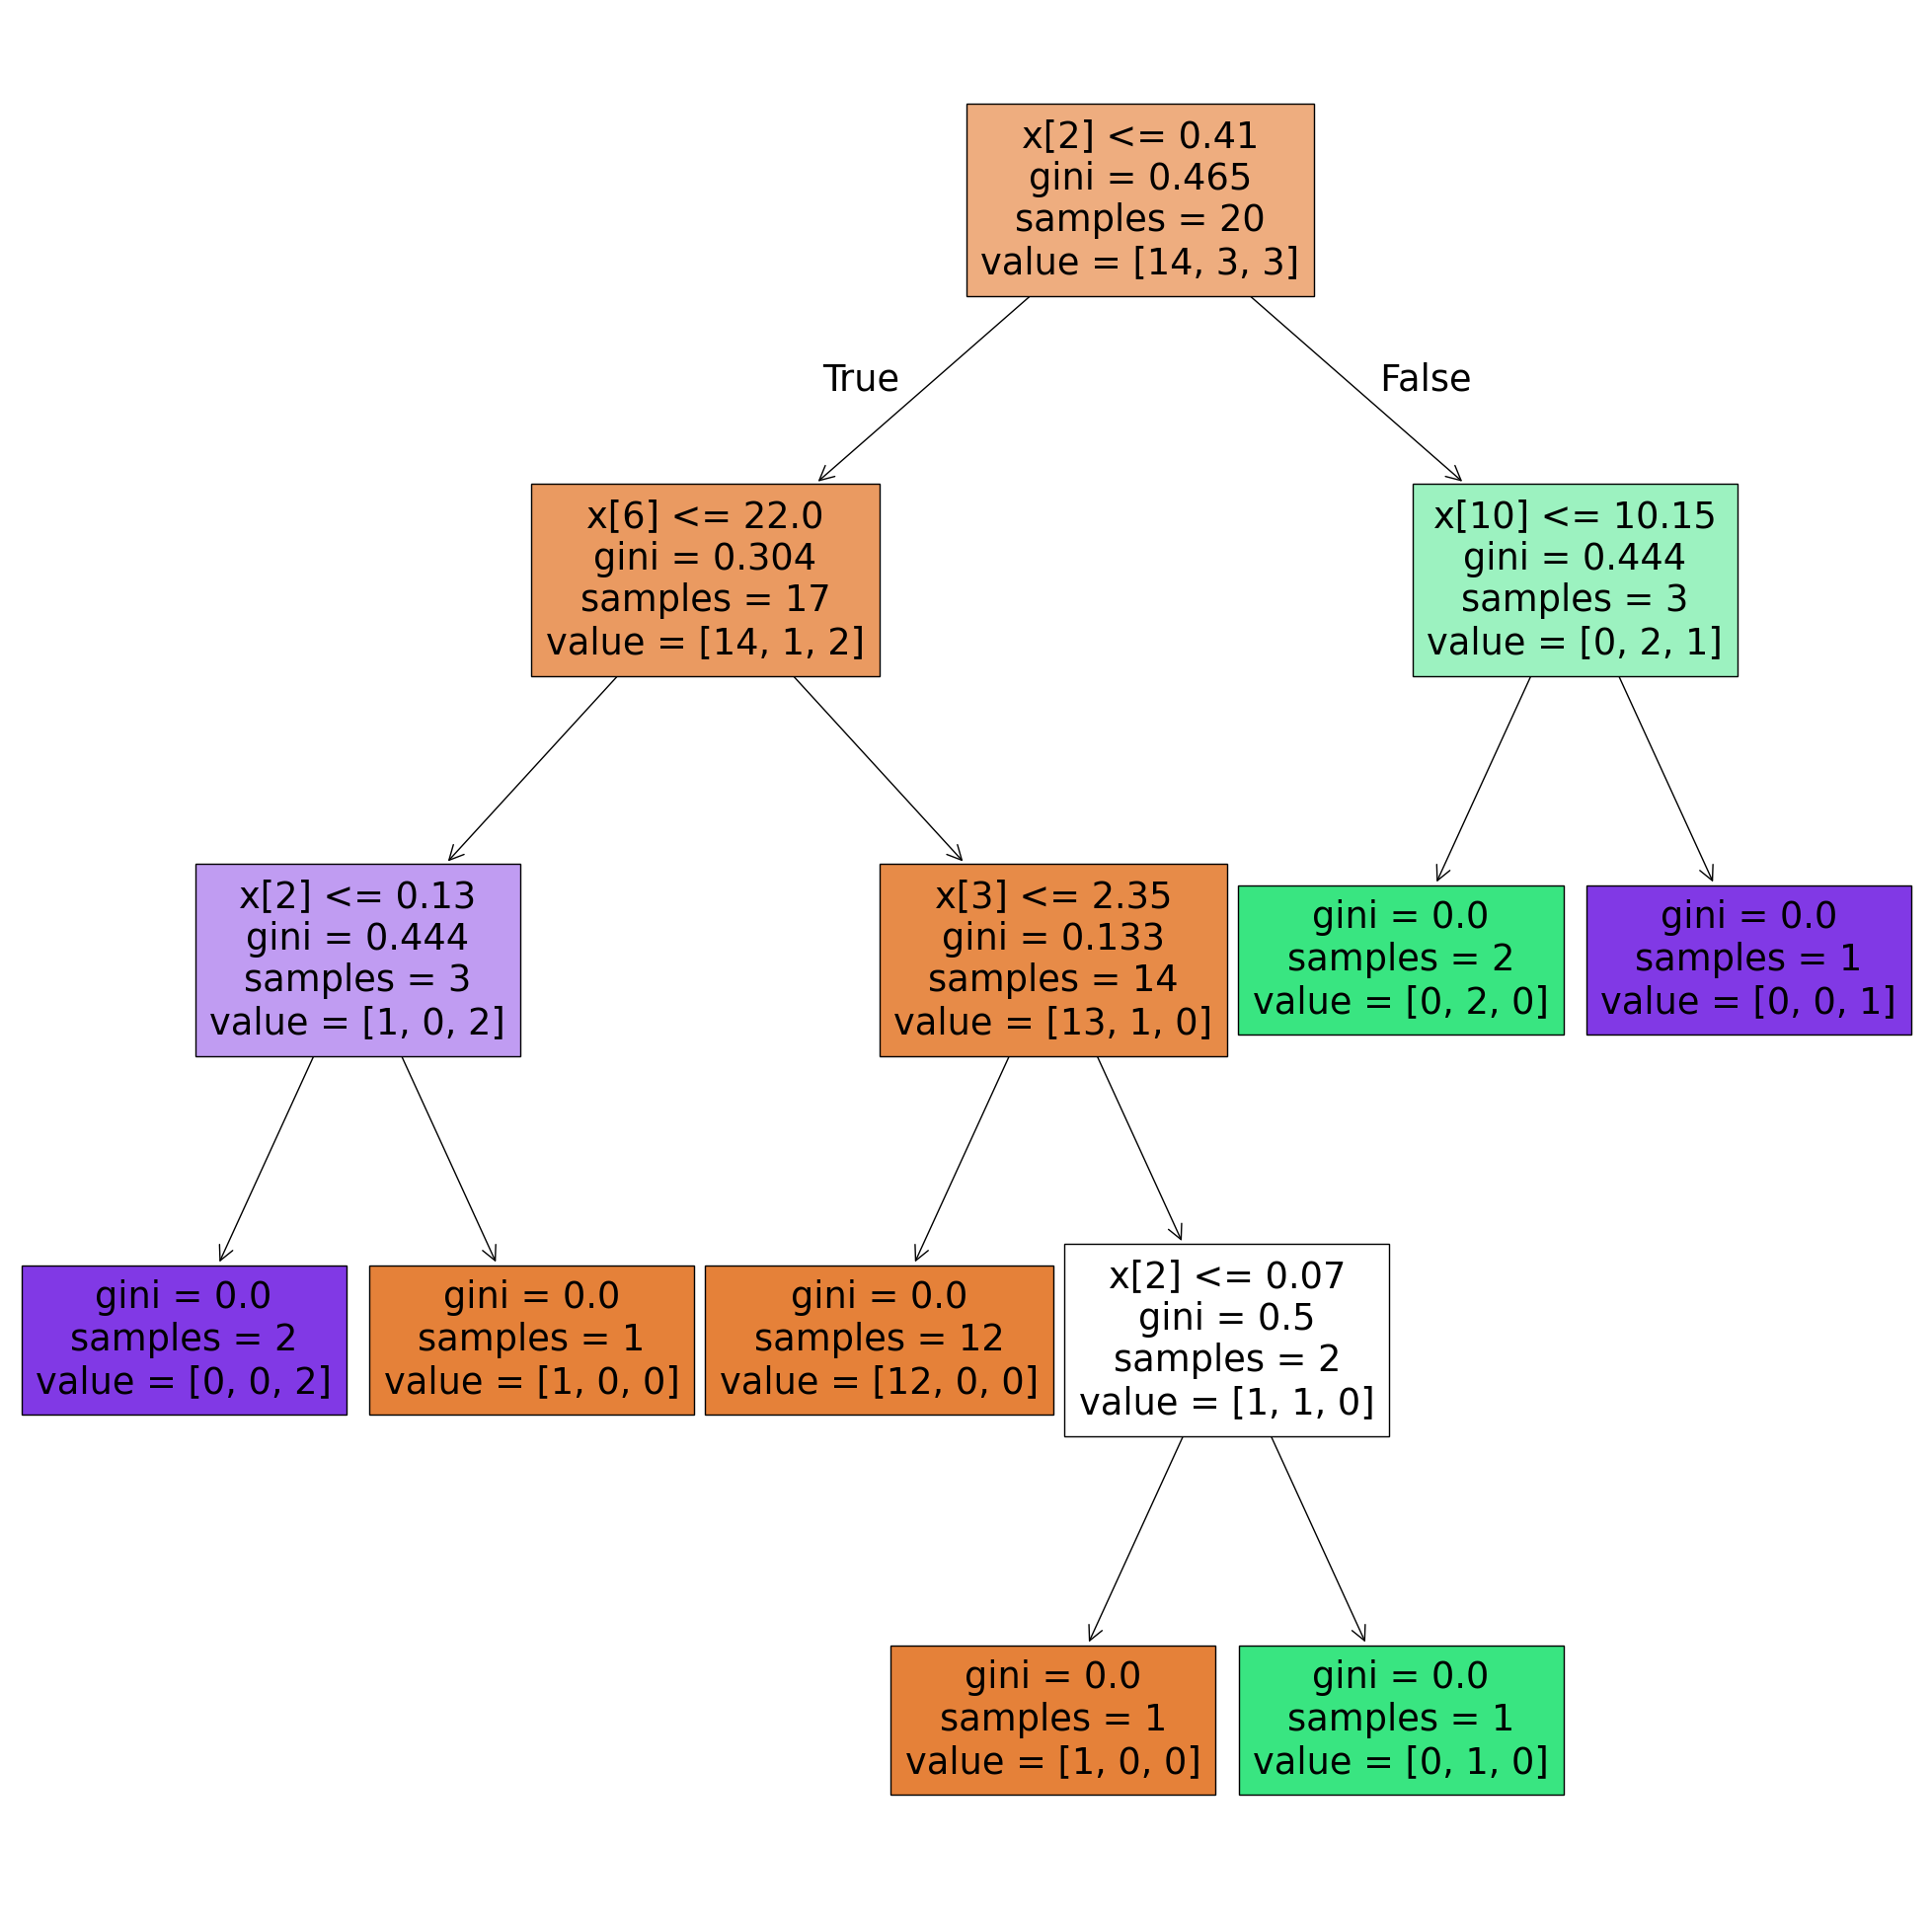

In [23]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(sample_model, filled=True)
plt.savefig('sample_tree.png')

In [24]:
sample_model_entropy= DecisionTreeClassifier(criterion='entropy')
sample_model_entropy.fit(X_sample, y_sample)

DecisionTreeClassifier(criterion='entropy')

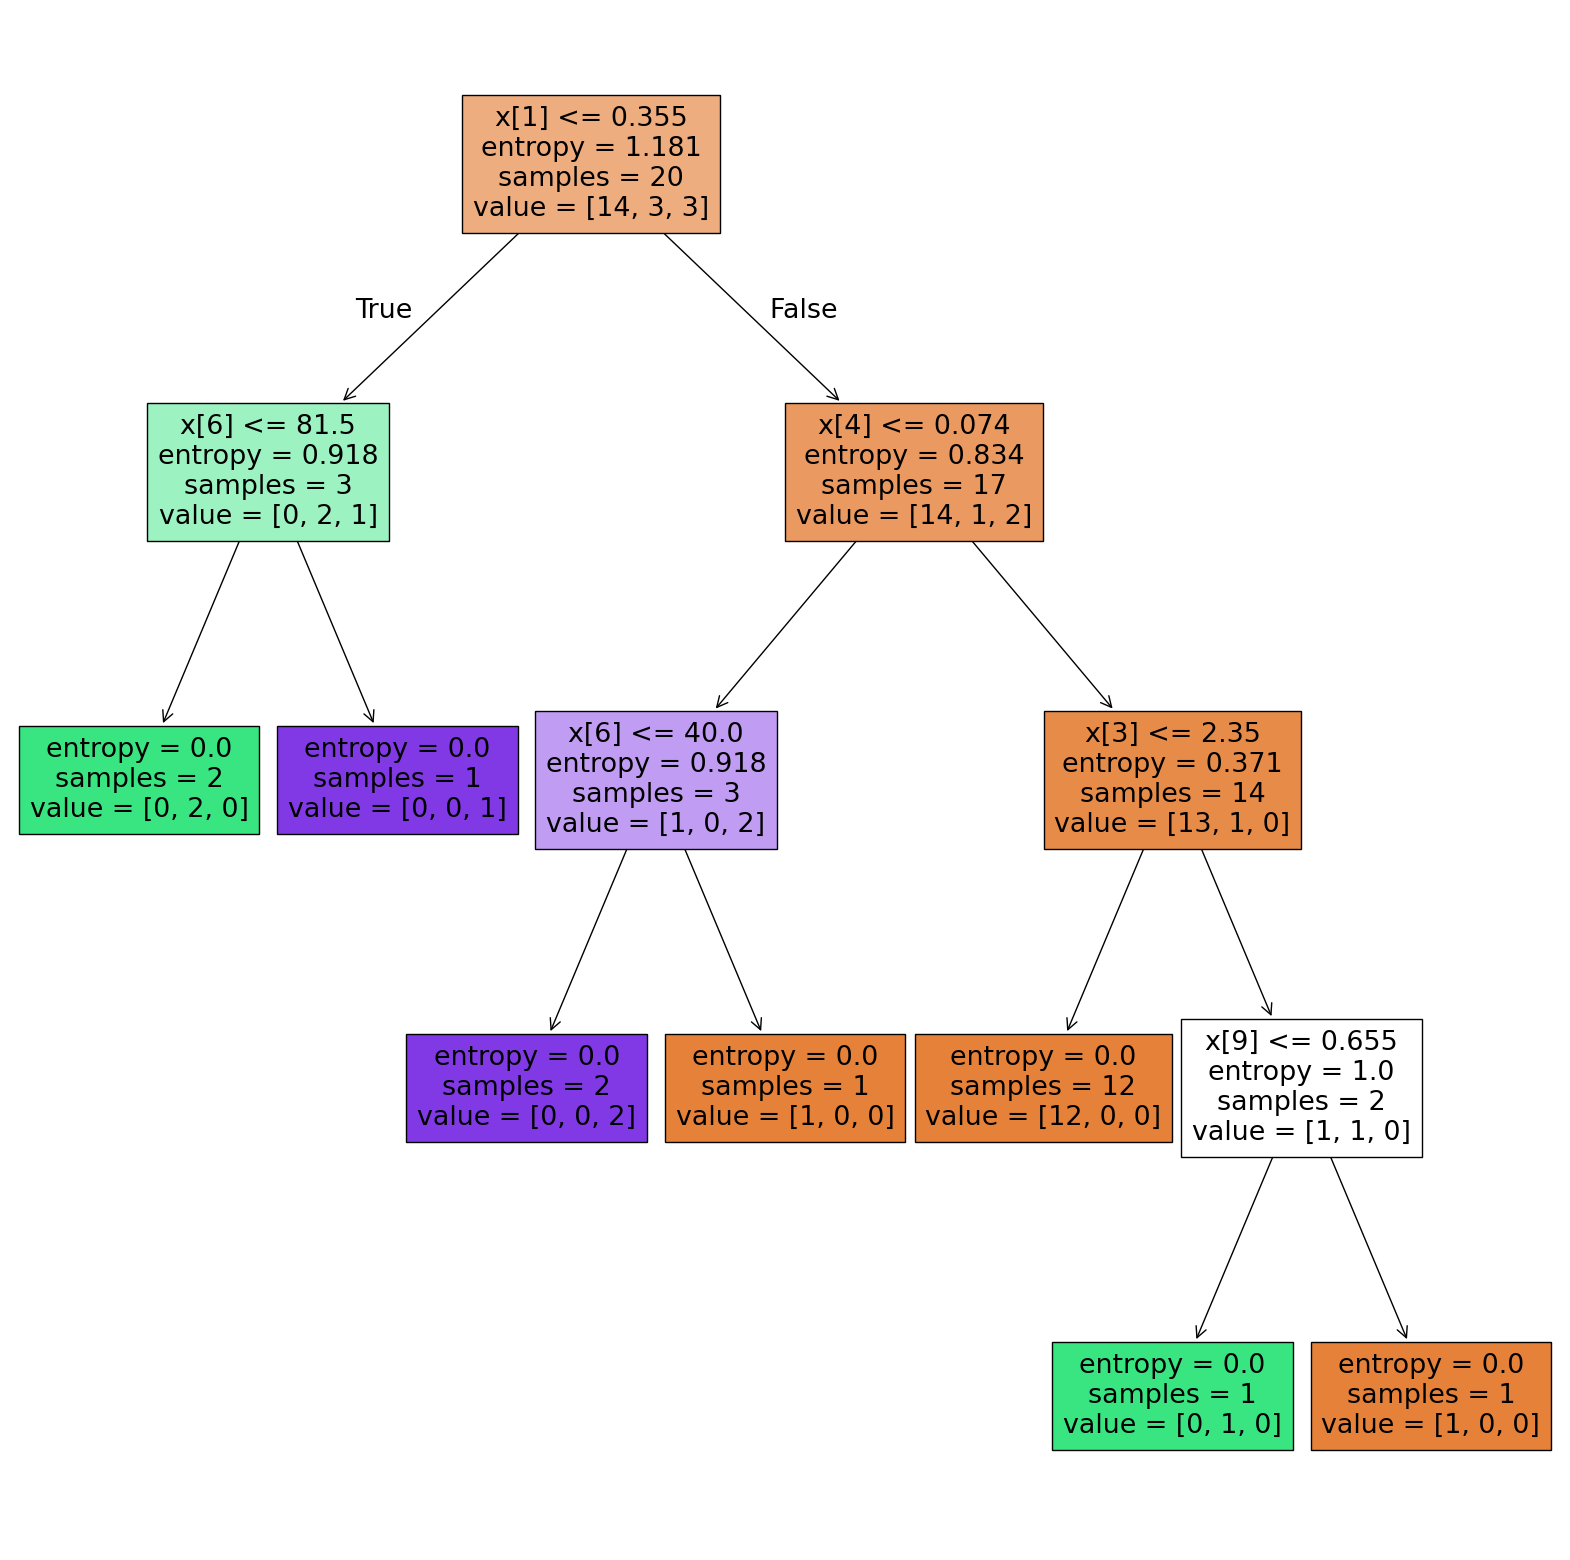

In [25]:
from sklearn import tree
plt.figure(figsize=(20,20))

tree.plot_tree(sample_model_entropy, filled=True)
plt.savefig('sample_model_tree_Entropy.png')
plt.show()

In [27]:
importances = sample_model_entropy.feature_importances_
print(importances)

[0.         0.28303914 0.         0.13532876 0.26376904 0.
 0.23320992 0.         0.         0.08465315 0.        ]


In [28]:
# feature of columns
feature_importance_df = pd.DataFrame( {
    'Feature': X_sample.columns,
    'Importance': importances
}).sort_values(by= 'Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
1       volatile acidity    0.283039
4              chlorides    0.263769
6   total sulfur dioxide    0.233210
3         residual sugar    0.135329
9              sulphates    0.084653
2            citric acid    0.000000
0          fixed acidity    0.000000
5    free sulfur dioxide    0.000000
7                density    0.000000
8                     pH    0.000000
10               alcohol    0.000000
